Now we know how to find minima of functions. Let's do the exercise where we pretend we know `THETA0` and then just find `THETA1`.

First, let me generate the dataset for you.

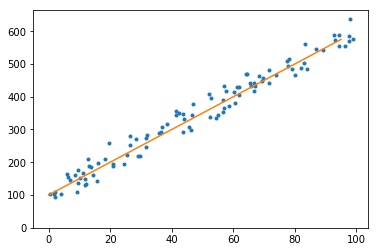

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

THETA0 = 100
THETA1 = 5.0
NOISE_STDDEV = 25

x = np.random.uniform(low = 0, high = 100, size = 100)
y = THETA0 + THETA1 * x
y += np.random.normal(scale = NOISE_STDDEV, size = 100)

plt.plot(x, y, '.')
plt.ylim(ymin = 0)

x_range = np.arange(0, 100, 5.0)
plt.plot(x_range, THETA0 + THETA1 * x_range, '-')

Next, your job is to plot the error function as a function of $\theta_1$ for a fixed $\theta_0 = 100$.

First, write a function called `sse_error`. This should find the SSE error for a given `theta1`. You may use `x`, `y`, and `THETA0`. I've given you a hint for checking the function.

Next, write a function called `sse_errors(theta1_values)`. This should create an empty numpy array of "return values" using `np.zeros`. How long should this array be? It should be as long as `theta1_values` is.

Next, iterate through `theta1_values`. Calculate the `sse_error` for each `theta1_values[idx]`. Store this in the return values array. Finally, return the array.

Plot the `sse_errors(theta1_values)` against the `theta1_values`. You should see a parabolic curve that has a minimum at about 5.0. (The minimum may not be exactly 5.0, because of overfitting).

64360.1077567


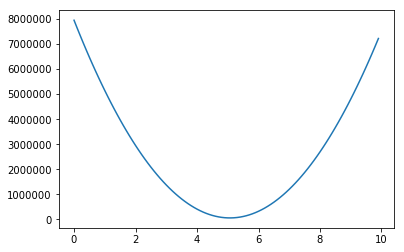

In [2]:
def sse_error(theta1):
    # you may use x, y, and THETA0 here.
    return np.sum(((THETA0 + theta1 * x) - y) ** 2)

# Should be 64360.1077567.
print(
    sse_error(5.0)
)

def sse_errors(theta1_values):
    values = np.zeros(len(theta1_values))
    for idx, theta1 in enumerate(theta1_values):
        values[idx] = sse_error(theta1)
        
    return values

theta1_values = np.arange(0, 10, 0.1)
plt.plot(theta1_values, sse_errors(theta1_values), '-')

Our next goal is to find the best $\hat\theta_1$ that minimizes the squared error.

To do this, **first** write a function `sse_error_deriv_wrt_theta1(theta0, theta1, x, y)`. You will need the formula for this derivative. You can calculate this from:

\\[
E(\theta_0, \theta_1) = \sum_{i=0}^N ((\theta_0 + \theta_1 x_i) - y_i)^2
\\
\frac{\partial E}{\partial \theta_1}(\theta_0, \theta_1) = \sum_{i=0}^N \text{(what goes here?)}
\\]

Two hints: (1) remember the polynomial rule that $f(x) = x^k \Rightarrow f'(x) = k x^{k - 1}$, and (2) the chain rule: $f(x) = g(h(x)) \Rightarrow f'(x) = g'(h(x))h'(x)$.

**Next**, write the function `sse_error_2nd_deriv_wrt_theta1(theta0, theta1, x, y)`.

Both these functions can be written in a vector form with no loops.

In [3]:
def sse_error_deriv_wrt_theta1(theta0, theta1, x, y):
    return np.sum(2 * ((theta0 + theta1 * x) - y) * x)

def sse_error_2nd_deriv_wrt_theta1(theta0, theta1, x, y):
    return np.sum(2 * x * x)

print(
    sse_error_deriv_wrt_theta1(THETA0, 5.0, x, y)
)
# => should be -42846.3348768

print(
    sse_error_2nd_deriv_wrt_theta1(THETA0, 5.0, x, y)
)
# => should be 613303.660271

-42846.3348768
613303.660271


Using these functions, and a starting point of `theta0 = 100.0` and `theta1 = 0.0` , use the derivative and second derivative to calculate the next guess for `theta1` according to Newton's Method.

In [4]:
theta0 = 100.0
theta1 = 0.0
print(
    theta1 + (
        -sse_error_deriv_wrt_theta1(theta0, theta1, x, y)
        / sse_error_2nd_deriv_wrt_theta1(theta0, theta1, x, y)
    )
)
# => Should be about 5.07

5.06986153459


**Bonus**:

1. Why is this so close to the right `\theta_1` after just one step?
2. If you want practice taking derivatives and second derivatives, repeat this process for finding $\theta_1$ for fixed $\theta_1 = 5.0$.